# Music Classification

Our main goal is to be able to make accurate predictions on a song’s genre. To achieve this, we will explore ways on how neural network architectures and splitting the training and testing data among groups affect our results and see if there are any benefits to do so.

We will also use multiple models - CNN, RNN - to achieve the best accuracy. Our main end goal is to them let anyone play around with our model, input any song and predict its genre.

[genre] is an integer from 0 to 9, indicating the genres: pop, metal, disco, blues, reggae, classical, rock, hiphop, country, jazz respectively.

## Table of content
1. Importing modules
2. Loading Dataset
3. Analyze Distributions
    * Genre Distribution
    * Inspecting genres
4. Split and Preprocess the data
5. Modelling and Training
    * CNN
    * RNN
5. Evaluating Models

## 1. Load modules

First, let's import some libraries that we're going to use in the notebook.

In [1]:
import json
import os
import math
import librosa
import pandas as pd
import numpy as np
import urllib.request
from PIL import Image
import IPython.display as ipd
from pytube import YouTube
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import pandas as pd
import librosa.display
import sklearn.metrics
from sklearn.model_selection import train_test_split

# To ensure reproducible results
RANDOM_SEED = 0
np.random.seed(RANDOM_SEED)
tf.random.set_seed(0)

## 2. Load dataset

Let's define some metadata. The dataset can be downloaded [here](https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification?select=Data).

In [2]:
DATASET_PATH = "Data/genres"
JSON_PATH = "data.json"
NUM_SEGMENTS = 10
HOP_LENGTH=512
SAMPLE_RATE = 22050  # music processing
TRACK_DURATION = 30  # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
ALL_GENRES = list()

Once the dataset downloaded and put in the <code>DATASET_PATH</code> mentionned above, <code>save_mfcc</code> is defined to perform the MFCCs (Mel frequency Cepstral coefficients) extraction and save them into a json file along with their respective genres.

In [190]:
def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a json file along witgh genre labels.
        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save MFCCs
        :param num_mfcc (int): Number of coefficients to extract
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :param hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        :return:
        """
    # check is data.json exists
    if (os.path.exists(json_path)):
        print(json_path, "already exists. Loading data stopped.")
         # loop through all genre sub-folder
        for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
            if dirpath is not dataset_path:

                # save genre label (i.e., sub-folder name) in the mapping
                semantic_label = dirpath.split("/")[-1]
                ALL_GENRES.append(semantic_label)
        return
    
#     dictionary to store mapping, labels, and MFCCs
#     data = {
#         "mapping": [],
#         "labels": [],
#         "mfcc": []
#     }
    json_data = []

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            ALL_GENRES.append(semantic_label)
#             data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

                # load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft,
                                                hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data = dict()
                        data["mfcc"] = mfcc.tolist()
                        data["genre"] = i - 1
                        json_data.append(data)
                        print('appppppppp')
                        print("{}, segment:{}".format(file_path, d + 1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(json_data, fp, indent=4)

In [191]:
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)


Processing: pop
appppppppp
Data/genres/pop/pop.00027.wav, segment:1
appppppppp
Data/genres/pop/pop.00027.wav, segment:2
appppppppp
Data/genres/pop/pop.00027.wav, segment:3
appppppppp
Data/genres/pop/pop.00027.wav, segment:4
appppppppp
Data/genres/pop/pop.00027.wav, segment:5
appppppppp
Data/genres/pop/pop.00027.wav, segment:6
appppppppp
Data/genres/pop/pop.00027.wav, segment:7
appppppppp
Data/genres/pop/pop.00027.wav, segment:8
appppppppp
Data/genres/pop/pop.00027.wav, segment:9
appppppppp
Data/genres/pop/pop.00027.wav, segment:10
appppppppp
Data/genres/pop/pop.00033.wav, segment:1
appppppppp
Data/genres/pop/pop.00033.wav, segment:2
appppppppp
Data/genres/pop/pop.00033.wav, segment:3
appppppppp
Data/genres/pop/pop.00033.wav, segment:4
appppppppp
Data/genres/pop/pop.00033.wav, segment:5
appppppppp
Data/genres/pop/pop.00033.wav, segment:6
appppppppp
Data/genres/pop/pop.00033.wav, segment:7
appppppppp
Data/genres/pop/pop.00033.wav, segment:8
appppppppp
Data/genres/pop/pop.00033.wav, segm

appppppppp
Data/genres/pop/pop.00008.wav, segment:9
appppppppp
Data/genres/pop/pop.00008.wav, segment:10
appppppppp
Data/genres/pop/pop.00022.wav, segment:1
appppppppp
Data/genres/pop/pop.00022.wav, segment:2
appppppppp
Data/genres/pop/pop.00022.wav, segment:3
appppppppp
Data/genres/pop/pop.00022.wav, segment:4
appppppppp
Data/genres/pop/pop.00022.wav, segment:5
appppppppp
Data/genres/pop/pop.00022.wav, segment:6
appppppppp
Data/genres/pop/pop.00022.wav, segment:7
appppppppp
Data/genres/pop/pop.00022.wav, segment:8
appppppppp
Data/genres/pop/pop.00022.wav, segment:9
appppppppp
Data/genres/pop/pop.00022.wav, segment:10
appppppppp
Data/genres/pop/pop.00036.wav, segment:1
appppppppp
Data/genres/pop/pop.00036.wav, segment:2
appppppppp
Data/genres/pop/pop.00036.wav, segment:3
appppppppp
Data/genres/pop/pop.00036.wav, segment:4
appppppppp
Data/genres/pop/pop.00036.wav, segment:5
appppppppp
Data/genres/pop/pop.00036.wav, segment:6
appppppppp
Data/genres/pop/pop.00036.wav, segment:7
appppppppp

appppppppp
Data/genres/pop/pop.00090.wav, segment:4
appppppppp
Data/genres/pop/pop.00090.wav, segment:5
appppppppp
Data/genres/pop/pop.00090.wav, segment:6
appppppppp
Data/genres/pop/pop.00090.wav, segment:7
appppppppp
Data/genres/pop/pop.00090.wav, segment:8
appppppppp
Data/genres/pop/pop.00090.wav, segment:9
appppppppp
Data/genres/pop/pop.00090.wav, segment:10
appppppppp
Data/genres/pop/pop.00084.wav, segment:1
appppppppp
Data/genres/pop/pop.00084.wav, segment:2
appppppppp
Data/genres/pop/pop.00084.wav, segment:3
appppppppp
Data/genres/pop/pop.00084.wav, segment:4
appppppppp
Data/genres/pop/pop.00084.wav, segment:5
appppppppp
Data/genres/pop/pop.00084.wav, segment:6
appppppppp
Data/genres/pop/pop.00084.wav, segment:7
appppppppp
Data/genres/pop/pop.00084.wav, segment:8
appppppppp
Data/genres/pop/pop.00084.wav, segment:9
appppppppp
Data/genres/pop/pop.00084.wav, segment:10
appppppppp
Data/genres/pop/pop.00085.wav, segment:1
appppppppp
Data/genres/pop/pop.00085.wav, segment:2
appppppppp

appppppppp
Data/genres/pop/pop.00055.wav, segment:9
appppppppp
Data/genres/pop/pop.00055.wav, segment:10
appppppppp
Data/genres/pop/pop.00082.wav, segment:1
appppppppp
Data/genres/pop/pop.00082.wav, segment:2
appppppppp
Data/genres/pop/pop.00082.wav, segment:3
appppppppp
Data/genres/pop/pop.00082.wav, segment:4
appppppppp
Data/genres/pop/pop.00082.wav, segment:5
appppppppp
Data/genres/pop/pop.00082.wav, segment:6
appppppppp
Data/genres/pop/pop.00082.wav, segment:7
appppppppp
Data/genres/pop/pop.00082.wav, segment:8
appppppppp
Data/genres/pop/pop.00082.wav, segment:9
appppppppp
Data/genres/pop/pop.00082.wav, segment:10
appppppppp
Data/genres/pop/pop.00096.wav, segment:1
appppppppp
Data/genres/pop/pop.00096.wav, segment:2
appppppppp
Data/genres/pop/pop.00096.wav, segment:3
appppppppp
Data/genres/pop/pop.00096.wav, segment:4
appppppppp
Data/genres/pop/pop.00096.wav, segment:5
appppppppp
Data/genres/pop/pop.00096.wav, segment:6
appppppppp
Data/genres/pop/pop.00096.wav, segment:7
appppppppp

appppppppp
Data/genres/pop/pop.00067.wav, segment:7
appppppppp
Data/genres/pop/pop.00067.wav, segment:8
appppppppp
Data/genres/pop/pop.00067.wav, segment:9
appppppppp
Data/genres/pop/pop.00067.wav, segment:10
appppppppp
Data/genres/pop/pop.00073.wav, segment:1
appppppppp
Data/genres/pop/pop.00073.wav, segment:2
appppppppp
Data/genres/pop/pop.00073.wav, segment:3
appppppppp
Data/genres/pop/pop.00073.wav, segment:4
appppppppp
Data/genres/pop/pop.00073.wav, segment:5
appppppppp
Data/genres/pop/pop.00073.wav, segment:6
appppppppp
Data/genres/pop/pop.00073.wav, segment:7
appppppppp
Data/genres/pop/pop.00073.wav, segment:8
appppppppp
Data/genres/pop/pop.00073.wav, segment:9
appppppppp
Data/genres/pop/pop.00073.wav, segment:10
appppppppp
Data/genres/pop/pop.00077.wav, segment:1
appppppppp
Data/genres/pop/pop.00077.wav, segment:2
appppppppp
Data/genres/pop/pop.00077.wav, segment:3
appppppppp
Data/genres/pop/pop.00077.wav, segment:4
appppppppp
Data/genres/pop/pop.00077.wav, segment:5
appppppppp

appppppppp
Data/genres/pop/pop.00007.wav, segment:4
appppppppp
Data/genres/pop/pop.00007.wav, segment:5
appppppppp
Data/genres/pop/pop.00007.wav, segment:6
appppppppp
Data/genres/pop/pop.00007.wav, segment:7
appppppppp
Data/genres/pop/pop.00007.wav, segment:8
appppppppp
Data/genres/pop/pop.00007.wav, segment:9
appppppppp
Data/genres/pop/pop.00007.wav, segment:10
appppppppp
Data/genres/pop/pop.00011.wav, segment:1
appppppppp
Data/genres/pop/pop.00011.wav, segment:2
appppppppp
Data/genres/pop/pop.00011.wav, segment:3
appppppppp
Data/genres/pop/pop.00011.wav, segment:4
appppppppp
Data/genres/pop/pop.00011.wav, segment:5
appppppppp
Data/genres/pop/pop.00011.wav, segment:6
appppppppp
Data/genres/pop/pop.00011.wav, segment:7
appppppppp
Data/genres/pop/pop.00011.wav, segment:8
appppppppp
Data/genres/pop/pop.00011.wav, segment:9
appppppppp
Data/genres/pop/pop.00011.wav, segment:10
appppppppp
Data/genres/pop/pop.00005.wav, segment:1
appppppppp
Data/genres/pop/pop.00005.wav, segment:2
appppppppp

appppppppp
Data/genres/metal/metal.00022.wav, segment:1
appppppppp
Data/genres/metal/metal.00022.wav, segment:2
appppppppp
Data/genres/metal/metal.00022.wav, segment:3
appppppppp
Data/genres/metal/metal.00022.wav, segment:4
appppppppp
Data/genres/metal/metal.00022.wav, segment:5
appppppppp
Data/genres/metal/metal.00022.wav, segment:6
appppppppp
Data/genres/metal/metal.00022.wav, segment:7
appppppppp
Data/genres/metal/metal.00022.wav, segment:8
appppppppp
Data/genres/metal/metal.00022.wav, segment:9
appppppppp
Data/genres/metal/metal.00022.wav, segment:10
appppppppp
Data/genres/metal/metal.00036.wav, segment:1
appppppppp
Data/genres/metal/metal.00036.wav, segment:2
appppppppp
Data/genres/metal/metal.00036.wav, segment:3
appppppppp
Data/genres/metal/metal.00036.wav, segment:4
appppppppp
Data/genres/metal/metal.00036.wav, segment:5
appppppppp
Data/genres/metal/metal.00036.wav, segment:6
appppppppp
Data/genres/metal/metal.00036.wav, segment:7
appppppppp
Data/genres/metal/metal.00036.wav, s

appppppppp
Data/genres/metal/metal.00027.wav, segment:6
appppppppp
Data/genres/metal/metal.00027.wav, segment:7
appppppppp
Data/genres/metal/metal.00027.wav, segment:8
appppppppp
Data/genres/metal/metal.00027.wav, segment:9
appppppppp
Data/genres/metal/metal.00027.wav, segment:10
appppppppp
Data/genres/metal/metal.00033.wav, segment:1
appppppppp
Data/genres/metal/metal.00033.wav, segment:2
appppppppp
Data/genres/metal/metal.00033.wav, segment:3
appppppppp
Data/genres/metal/metal.00033.wav, segment:4
appppppppp
Data/genres/metal/metal.00033.wav, segment:5
appppppppp
Data/genres/metal/metal.00033.wav, segment:6
appppppppp
Data/genres/metal/metal.00033.wav, segment:7
appppppppp
Data/genres/metal/metal.00033.wav, segment:8
appppppppp
Data/genres/metal/metal.00033.wav, segment:9
appppppppp
Data/genres/metal/metal.00033.wav, segment:10
appppppppp
Data/genres/metal/metal.00032.wav, segment:1
appppppppp
Data/genres/metal/metal.00032.wav, segment:2
appppppppp
Data/genres/metal/metal.00032.wav, 

appppppppp
Data/genres/metal/metal.00042.wav, segment:5
appppppppp
Data/genres/metal/metal.00042.wav, segment:6
appppppppp
Data/genres/metal/metal.00042.wav, segment:7
appppppppp
Data/genres/metal/metal.00042.wav, segment:8
appppppppp
Data/genres/metal/metal.00042.wav, segment:9
appppppppp
Data/genres/metal/metal.00042.wav, segment:10
appppppppp
Data/genres/metal/metal.00043.wav, segment:1
appppppppp
Data/genres/metal/metal.00043.wav, segment:2
appppppppp
Data/genres/metal/metal.00043.wav, segment:3
appppppppp
Data/genres/metal/metal.00043.wav, segment:4
appppppppp
Data/genres/metal/metal.00043.wav, segment:5
appppppppp
Data/genres/metal/metal.00043.wav, segment:6
appppppppp
Data/genres/metal/metal.00043.wav, segment:7
appppppppp
Data/genres/metal/metal.00043.wav, segment:8
appppppppp
Data/genres/metal/metal.00043.wav, segment:9
appppppppp
Data/genres/metal/metal.00043.wav, segment:10
appppppppp
Data/genres/metal/metal.00057.wav, segment:1
appppppppp
Data/genres/metal/metal.00057.wav, 

Data/genres/metal/metal.00078.wav, segment:3
appppppppp
Data/genres/metal/metal.00078.wav, segment:4
appppppppp
Data/genres/metal/metal.00078.wav, segment:5
appppppppp
Data/genres/metal/metal.00078.wav, segment:6
appppppppp
Data/genres/metal/metal.00078.wav, segment:7
appppppppp
Data/genres/metal/metal.00078.wav, segment:8
appppppppp
Data/genres/metal/metal.00078.wav, segment:9
appppppppp
Data/genres/metal/metal.00078.wav, segment:10
appppppppp
Data/genres/metal/metal.00079.wav, segment:1
appppppppp
Data/genres/metal/metal.00079.wav, segment:2
appppppppp
Data/genres/metal/metal.00079.wav, segment:3
appppppppp
Data/genres/metal/metal.00079.wav, segment:4
appppppppp
Data/genres/metal/metal.00079.wav, segment:5
appppppppp
Data/genres/metal/metal.00079.wav, segment:6
appppppppp
Data/genres/metal/metal.00079.wav, segment:7
appppppppp
Data/genres/metal/metal.00079.wav, segment:8
appppppppp
Data/genres/metal/metal.00079.wav, segment:9
appppppppp
Data/genres/metal/metal.00079.wav, segment:10
a

appppppppp
Data/genres/metal/metal.00089.wav, segment:4
appppppppp
Data/genres/metal/metal.00089.wav, segment:5
appppppppp
Data/genres/metal/metal.00089.wav, segment:6
appppppppp
Data/genres/metal/metal.00089.wav, segment:7
appppppppp
Data/genres/metal/metal.00089.wav, segment:8
appppppppp
Data/genres/metal/metal.00089.wav, segment:9
appppppppp
Data/genres/metal/metal.00089.wav, segment:10
appppppppp
Data/genres/metal/metal.00099.wav, segment:1
appppppppp
Data/genres/metal/metal.00099.wav, segment:2
appppppppp
Data/genres/metal/metal.00099.wav, segment:3
appppppppp
Data/genres/metal/metal.00099.wav, segment:4
appppppppp
Data/genres/metal/metal.00099.wav, segment:5
appppppppp
Data/genres/metal/metal.00099.wav, segment:6
appppppppp
Data/genres/metal/metal.00099.wav, segment:7
appppppppp
Data/genres/metal/metal.00099.wav, segment:8
appppppppp
Data/genres/metal/metal.00099.wav, segment:9
appppppppp
Data/genres/metal/metal.00099.wav, segment:10
appppppppp
Data/genres/metal/metal.00072.wav, 

appppppppp
Data/genres/metal/metal.00028.wav, segment:3
appppppppp
Data/genres/metal/metal.00028.wav, segment:4
appppppppp
Data/genres/metal/metal.00028.wav, segment:5
appppppppp
Data/genres/metal/metal.00028.wav, segment:6
appppppppp
Data/genres/metal/metal.00028.wav, segment:7
appppppppp
Data/genres/metal/metal.00028.wav, segment:8
appppppppp
Data/genres/metal/metal.00028.wav, segment:9
appppppppp
Data/genres/metal/metal.00028.wav, segment:10
appppppppp
Data/genres/metal/metal.00014.wav, segment:1
appppppppp
Data/genres/metal/metal.00014.wav, segment:2
appppppppp
Data/genres/metal/metal.00014.wav, segment:3
appppppppp
Data/genres/metal/metal.00014.wav, segment:4
appppppppp
Data/genres/metal/metal.00014.wav, segment:5
appppppppp
Data/genres/metal/metal.00014.wav, segment:6
appppppppp
Data/genres/metal/metal.00014.wav, segment:7
appppppppp
Data/genres/metal/metal.00014.wav, segment:8
appppppppp
Data/genres/metal/metal.00014.wav, segment:9
appppppppp
Data/genres/metal/metal.00014.wav, s

appppppppp
Data/genres/disco/disco.00052.wav, segment:9
appppppppp
Data/genres/disco/disco.00052.wav, segment:10
appppppppp
Data/genres/disco/disco.00046.wav, segment:1
appppppppp
Data/genres/disco/disco.00046.wav, segment:2
appppppppp
Data/genres/disco/disco.00046.wav, segment:3
appppppppp
Data/genres/disco/disco.00046.wav, segment:4
appppppppp
Data/genres/disco/disco.00046.wav, segment:5
appppppppp
Data/genres/disco/disco.00046.wav, segment:6
appppppppp
Data/genres/disco/disco.00046.wav, segment:7
appppppppp
Data/genres/disco/disco.00046.wav, segment:8
appppppppp
Data/genres/disco/disco.00046.wav, segment:9
appppppppp
Data/genres/disco/disco.00046.wav, segment:10
appppppppp
Data/genres/disco/disco.00091.wav, segment:1
appppppppp
Data/genres/disco/disco.00091.wav, segment:2
appppppppp
Data/genres/disco/disco.00091.wav, segment:3
appppppppp
Data/genres/disco/disco.00091.wav, segment:4
appppppppp
Data/genres/disco/disco.00091.wav, segment:5
appppppppp
Data/genres/disco/disco.00091.wav, 

appppppppp
Data/genres/disco/disco.00044.wav, segment:9
appppppppp
Data/genres/disco/disco.00044.wav, segment:10
appppppppp
Data/genres/disco/disco.00068.wav, segment:1
appppppppp
Data/genres/disco/disco.00068.wav, segment:2
appppppppp
Data/genres/disco/disco.00068.wav, segment:3
appppppppp
Data/genres/disco/disco.00068.wav, segment:4
appppppppp
Data/genres/disco/disco.00068.wav, segment:5
appppppppp
Data/genres/disco/disco.00068.wav, segment:6
appppppppp
Data/genres/disco/disco.00068.wav, segment:7
appppppppp
Data/genres/disco/disco.00068.wav, segment:8
appppppppp
Data/genres/disco/disco.00068.wav, segment:9
appppppppp
Data/genres/disco/disco.00068.wav, segment:10
appppppppp
Data/genres/disco/disco.00040.wav, segment:1
appppppppp
Data/genres/disco/disco.00040.wav, segment:2
appppppppp
Data/genres/disco/disco.00040.wav, segment:3
appppppppp
Data/genres/disco/disco.00040.wav, segment:4
appppppppp
Data/genres/disco/disco.00040.wav, segment:5
appppppppp
Data/genres/disco/disco.00040.wav, 

appppppppp
Data/genres/disco/disco.00042.wav, segment:6
appppppppp
Data/genres/disco/disco.00042.wav, segment:7
appppppppp
Data/genres/disco/disco.00042.wav, segment:8
appppppppp
Data/genres/disco/disco.00042.wav, segment:9
appppppppp
Data/genres/disco/disco.00042.wav, segment:10
appppppppp
Data/genres/disco/disco.00056.wav, segment:1
appppppppp
Data/genres/disco/disco.00056.wav, segment:2
appppppppp
Data/genres/disco/disco.00056.wav, segment:3
appppppppp
Data/genres/disco/disco.00056.wav, segment:4
appppppppp
Data/genres/disco/disco.00056.wav, segment:5
appppppppp
Data/genres/disco/disco.00056.wav, segment:6
appppppppp
Data/genres/disco/disco.00056.wav, segment:7
appppppppp
Data/genres/disco/disco.00056.wav, segment:8
appppppppp
Data/genres/disco/disco.00056.wav, segment:9
appppppppp
Data/genres/disco/disco.00056.wav, segment:10
appppppppp
Data/genres/disco/disco.00031.wav, segment:1
appppppppp
Data/genres/disco/disco.00031.wav, segment:2
appppppppp
Data/genres/disco/disco.00031.wav, 

appppppppp
Data/genres/disco/disco.00034.wav, segment:5
appppppppp
Data/genres/disco/disco.00034.wav, segment:6
appppppppp
Data/genres/disco/disco.00034.wav, segment:7
appppppppp
Data/genres/disco/disco.00034.wav, segment:8
appppppppp
Data/genres/disco/disco.00034.wav, segment:9
appppppppp
Data/genres/disco/disco.00034.wav, segment:10
appppppppp
Data/genres/disco/disco.00020.wav, segment:1
appppppppp
Data/genres/disco/disco.00020.wav, segment:2
appppppppp
Data/genres/disco/disco.00020.wav, segment:3
appppppppp
Data/genres/disco/disco.00020.wav, segment:4
appppppppp
Data/genres/disco/disco.00020.wav, segment:5
appppppppp
Data/genres/disco/disco.00020.wav, segment:6
appppppppp
Data/genres/disco/disco.00020.wav, segment:7
appppppppp
Data/genres/disco/disco.00020.wav, segment:8
appppppppp
Data/genres/disco/disco.00020.wav, segment:9
appppppppp
Data/genres/disco/disco.00020.wav, segment:10
appppppppp
Data/genres/disco/disco.00021.wav, segment:1
appppppppp
Data/genres/disco/disco.00021.wav, 

appppppppp
Data/genres/disco/disco.00017.wav, segment:1
appppppppp
Data/genres/disco/disco.00017.wav, segment:2
appppppppp
Data/genres/disco/disco.00017.wav, segment:3
appppppppp
Data/genres/disco/disco.00017.wav, segment:4
appppppppp
Data/genres/disco/disco.00017.wav, segment:5
appppppppp
Data/genres/disco/disco.00017.wav, segment:6
appppppppp
Data/genres/disco/disco.00017.wav, segment:7
appppppppp
Data/genres/disco/disco.00017.wav, segment:8
appppppppp
Data/genres/disco/disco.00017.wav, segment:9
appppppppp
Data/genres/disco/disco.00017.wav, segment:10
appppppppp
Data/genres/disco/disco.00003.wav, segment:1
appppppppp
Data/genres/disco/disco.00003.wav, segment:2
appppppppp
Data/genres/disco/disco.00003.wav, segment:3
appppppppp
Data/genres/disco/disco.00003.wav, segment:4
appppppppp
Data/genres/disco/disco.00003.wav, segment:5
appppppppp
Data/genres/disco/disco.00003.wav, segment:6
appppppppp
Data/genres/disco/disco.00003.wav, segment:7
appppppppp
Data/genres/disco/disco.00003.wav, s

appppppppp
Data/genres/disco/disco.00058.wav, segment:8
appppppppp
Data/genres/disco/disco.00058.wav, segment:9
appppppppp
Data/genres/disco/disco.00058.wav, segment:10
appppppppp
Data/genres/disco/disco.00059.wav, segment:1
appppppppp
Data/genres/disco/disco.00059.wav, segment:2
appppppppp
Data/genres/disco/disco.00059.wav, segment:3
appppppppp
Data/genres/disco/disco.00059.wav, segment:4
appppppppp
Data/genres/disco/disco.00059.wav, segment:5
appppppppp
Data/genres/disco/disco.00059.wav, segment:6
appppppppp
Data/genres/disco/disco.00059.wav, segment:7
appppppppp
Data/genres/disco/disco.00059.wav, segment:8
appppppppp
Data/genres/disco/disco.00059.wav, segment:9
appppppppp
Data/genres/disco/disco.00059.wav, segment:10
appppppppp
Data/genres/disco/disco.00071.wav, segment:1
appppppppp
Data/genres/disco/disco.00071.wav, segment:2
appppppppp
Data/genres/disco/disco.00071.wav, segment:3
appppppppp
Data/genres/disco/disco.00071.wav, segment:4
appppppppp
Data/genres/disco/disco.00071.wav, 

appppppppp
Data/genres/blues/blues.00087.wav, segment:5
appppppppp
Data/genres/blues/blues.00087.wav, segment:6
appppppppp
Data/genres/blues/blues.00087.wav, segment:7
appppppppp
Data/genres/blues/blues.00087.wav, segment:8
appppppppp
Data/genres/blues/blues.00087.wav, segment:9
appppppppp
Data/genres/blues/blues.00087.wav, segment:10
appppppppp
Data/genres/blues/blues.00050.wav, segment:1
appppppppp
Data/genres/blues/blues.00050.wav, segment:2
appppppppp
Data/genres/blues/blues.00050.wav, segment:3
appppppppp
Data/genres/blues/blues.00050.wav, segment:4
appppppppp
Data/genres/blues/blues.00050.wav, segment:5
appppppppp
Data/genres/blues/blues.00050.wav, segment:6
appppppppp
Data/genres/blues/blues.00050.wav, segment:7
appppppppp
Data/genres/blues/blues.00050.wav, segment:8
appppppppp
Data/genres/blues/blues.00050.wav, segment:9
appppppppp
Data/genres/blues/blues.00050.wav, segment:10
appppppppp
Data/genres/blues/blues.00044.wav, segment:1
appppppppp
Data/genres/blues/blues.00044.wav, 

appppppppp
Data/genres/blues/blues.00081.wav, segment:4
appppppppp
Data/genres/blues/blues.00081.wav, segment:5
appppppppp
Data/genres/blues/blues.00081.wav, segment:6
appppppppp
Data/genres/blues/blues.00081.wav, segment:7
appppppppp
Data/genres/blues/blues.00081.wav, segment:8
appppppppp
Data/genres/blues/blues.00081.wav, segment:9
appppppppp
Data/genres/blues/blues.00081.wav, segment:10
appppppppp
Data/genres/blues/blues.00095.wav, segment:1
appppppppp
Data/genres/blues/blues.00095.wav, segment:2
appppppppp
Data/genres/blues/blues.00095.wav, segment:3
appppppppp
Data/genres/blues/blues.00095.wav, segment:4
appppppppp
Data/genres/blues/blues.00095.wav, segment:5
appppppppp
Data/genres/blues/blues.00095.wav, segment:6
appppppppp
Data/genres/blues/blues.00095.wav, segment:7
appppppppp
Data/genres/blues/blues.00095.wav, segment:8
appppppppp
Data/genres/blues/blues.00095.wav, segment:9
appppppppp
Data/genres/blues/blues.00095.wav, segment:10
appppppppp
Data/genres/blues/blues.00042.wav, 

appppppppp
Data/genres/blues/blues.00097.wav, segment:1
appppppppp
Data/genres/blues/blues.00097.wav, segment:2
appppppppp
Data/genres/blues/blues.00097.wav, segment:3
appppppppp
Data/genres/blues/blues.00097.wav, segment:4
appppppppp
Data/genres/blues/blues.00097.wav, segment:5
appppppppp
Data/genres/blues/blues.00097.wav, segment:6
appppppppp
Data/genres/blues/blues.00097.wav, segment:7
appppppppp
Data/genres/blues/blues.00097.wav, segment:8
appppppppp
Data/genres/blues/blues.00097.wav, segment:9
appppppppp
Data/genres/blues/blues.00097.wav, segment:10
appppppppp
Data/genres/blues/blues.00033.wav, segment:1
appppppppp
Data/genres/blues/blues.00033.wav, segment:2
appppppppp
Data/genres/blues/blues.00033.wav, segment:3
appppppppp
Data/genres/blues/blues.00033.wav, segment:4
appppppppp
Data/genres/blues/blues.00033.wav, segment:5
appppppppp
Data/genres/blues/blues.00033.wav, segment:6
appppppppp
Data/genres/blues/blues.00033.wav, segment:7
appppppppp
Data/genres/blues/blues.00033.wav, s

appppppppp
Data/genres/blues/blues.00008.wav, segment:4
appppppppp
Data/genres/blues/blues.00008.wav, segment:5
appppppppp
Data/genres/blues/blues.00008.wav, segment:6
appppppppp
Data/genres/blues/blues.00008.wav, segment:7
appppppppp
Data/genres/blues/blues.00008.wav, segment:8
appppppppp
Data/genres/blues/blues.00008.wav, segment:9
appppppppp
Data/genres/blues/blues.00008.wav, segment:10
appppppppp
Data/genres/blues/blues.00036.wav, segment:1
appppppppp
Data/genres/blues/blues.00036.wav, segment:2
appppppppp
Data/genres/blues/blues.00036.wav, segment:3
appppppppp
Data/genres/blues/blues.00036.wav, segment:4
appppppppp
Data/genres/blues/blues.00036.wav, segment:5
appppppppp
Data/genres/blues/blues.00036.wav, segment:6
appppppppp
Data/genres/blues/blues.00036.wav, segment:7
appppppppp
Data/genres/blues/blues.00036.wav, segment:8
appppppppp
Data/genres/blues/blues.00036.wav, segment:9
appppppppp
Data/genres/blues/blues.00036.wav, segment:10
appppppppp
Data/genres/blues/blues.00022.wav, 

appppppppp
Data/genres/blues/blues.00014.wav, segment:5
appppppppp
Data/genres/blues/blues.00014.wav, segment:6
appppppppp
Data/genres/blues/blues.00014.wav, segment:7
appppppppp
Data/genres/blues/blues.00014.wav, segment:8
appppppppp
Data/genres/blues/blues.00014.wav, segment:9
appppppppp
Data/genres/blues/blues.00014.wav, segment:10
appppppppp
Data/genres/blues/blues.00015.wav, segment:1
appppppppp
Data/genres/blues/blues.00015.wav, segment:2
appppppppp
Data/genres/blues/blues.00015.wav, segment:3
appppppppp
Data/genres/blues/blues.00015.wav, segment:4
appppppppp
Data/genres/blues/blues.00015.wav, segment:5
appppppppp
Data/genres/blues/blues.00015.wav, segment:6
appppppppp
Data/genres/blues/blues.00015.wav, segment:7
appppppppp
Data/genres/blues/blues.00015.wav, segment:8
appppppppp
Data/genres/blues/blues.00015.wav, segment:9
appppppppp
Data/genres/blues/blues.00015.wav, segment:10
appppppppp
Data/genres/blues/blues.00001.wav, segment:1
appppppppp
Data/genres/blues/blues.00001.wav, 

appppppppp
Data/genres/blues/blues.00073.wav, segment:4
appppppppp
Data/genres/blues/blues.00073.wav, segment:5
appppppppp
Data/genres/blues/blues.00073.wav, segment:6
appppppppp
Data/genres/blues/blues.00073.wav, segment:7
appppppppp
Data/genres/blues/blues.00073.wav, segment:8
appppppppp
Data/genres/blues/blues.00073.wav, segment:9
appppppppp
Data/genres/blues/blues.00073.wav, segment:10
appppppppp
Data/genres/blues/blues.00067.wav, segment:1
appppppppp
Data/genres/blues/blues.00067.wav, segment:2
appppppppp
Data/genres/blues/blues.00067.wav, segment:3
appppppppp
Data/genres/blues/blues.00067.wav, segment:4
appppppppp
Data/genres/blues/blues.00067.wav, segment:5
appppppppp
Data/genres/blues/blues.00067.wav, segment:6
appppppppp
Data/genres/blues/blues.00067.wav, segment:7
appppppppp
Data/genres/blues/blues.00067.wav, segment:8
appppppppp
Data/genres/blues/blues.00067.wav, segment:9
appppppppp
Data/genres/blues/blues.00067.wav, segment:10
appppppppp
Data/genres/blues/blues.00098.wav, 

appppppppp
Data/genres/reggae/reggae.00043.wav, segment:3
appppppppp
Data/genres/reggae/reggae.00043.wav, segment:4
appppppppp
Data/genres/reggae/reggae.00043.wav, segment:5
appppppppp
Data/genres/reggae/reggae.00043.wav, segment:6
appppppppp
Data/genres/reggae/reggae.00043.wav, segment:7
appppppppp
Data/genres/reggae/reggae.00043.wav, segment:8
appppppppp
Data/genres/reggae/reggae.00043.wav, segment:9
appppppppp
Data/genres/reggae/reggae.00043.wav, segment:10
appppppppp
Data/genres/reggae/reggae.00057.wav, segment:1
appppppppp
Data/genres/reggae/reggae.00057.wav, segment:2
appppppppp
Data/genres/reggae/reggae.00057.wav, segment:3
appppppppp
Data/genres/reggae/reggae.00057.wav, segment:4
appppppppp
Data/genres/reggae/reggae.00057.wav, segment:5
appppppppp
Data/genres/reggae/reggae.00057.wav, segment:6
appppppppp
Data/genres/reggae/reggae.00057.wav, segment:7
appppppppp
Data/genres/reggae/reggae.00057.wav, segment:8
appppppppp
Data/genres/reggae/reggae.00057.wav, segment:9
appppppppp
Da

appppppppp
Data/genres/reggae/reggae.00086.wav, segment:6
appppppppp
Data/genres/reggae/reggae.00086.wav, segment:7
appppppppp
Data/genres/reggae/reggae.00086.wav, segment:8
appppppppp
Data/genres/reggae/reggae.00086.wav, segment:9
appppppppp
Data/genres/reggae/reggae.00086.wav, segment:10
appppppppp
Data/genres/reggae/reggae.00079.wav, segment:1
appppppppp
Data/genres/reggae/reggae.00079.wav, segment:2
appppppppp
Data/genres/reggae/reggae.00079.wav, segment:3
appppppppp
Data/genres/reggae/reggae.00079.wav, segment:4
appppppppp
Data/genres/reggae/reggae.00079.wav, segment:5
appppppppp
Data/genres/reggae/reggae.00079.wav, segment:6
appppppppp
Data/genres/reggae/reggae.00079.wav, segment:7
appppppppp
Data/genres/reggae/reggae.00079.wav, segment:8
appppppppp
Data/genres/reggae/reggae.00079.wav, segment:9
appppppppp
Data/genres/reggae/reggae.00079.wav, segment:10
appppppppp
Data/genres/reggae/reggae.00051.wav, segment:1
appppppppp
Data/genres/reggae/reggae.00051.wav, segment:2
appppppppp
D

appppppppp
Data/genres/reggae/reggae.00020.wav, segment:5
appppppppp
Data/genres/reggae/reggae.00020.wav, segment:6
appppppppp
Data/genres/reggae/reggae.00020.wav, segment:7
appppppppp
Data/genres/reggae/reggae.00020.wav, segment:8
appppppppp
Data/genres/reggae/reggae.00020.wav, segment:9
appppppppp
Data/genres/reggae/reggae.00020.wav, segment:10
appppppppp
Data/genres/reggae/reggae.00034.wav, segment:1
appppppppp
Data/genres/reggae/reggae.00034.wav, segment:2
appppppppp
Data/genres/reggae/reggae.00034.wav, segment:3
appppppppp
Data/genres/reggae/reggae.00034.wav, segment:4
appppppppp
Data/genres/reggae/reggae.00034.wav, segment:5
appppppppp
Data/genres/reggae/reggae.00034.wav, segment:6
appppppppp
Data/genres/reggae/reggae.00034.wav, segment:7
appppppppp
Data/genres/reggae/reggae.00034.wav, segment:8
appppppppp
Data/genres/reggae/reggae.00034.wav, segment:9
appppppppp
Data/genres/reggae/reggae.00034.wav, segment:10
appppppppp
Data/genres/reggae/reggae.00008.wav, segment:1
appppppppp
D

appppppppp
Data/genres/reggae/reggae.00030.wav, segment:4
appppppppp
Data/genres/reggae/reggae.00030.wav, segment:5
appppppppp
Data/genres/reggae/reggae.00030.wav, segment:6
appppppppp
Data/genres/reggae/reggae.00030.wav, segment:7
appppppppp
Data/genres/reggae/reggae.00030.wav, segment:8
appppppppp
Data/genres/reggae/reggae.00030.wav, segment:9
appppppppp
Data/genres/reggae/reggae.00030.wav, segment:10
appppppppp
Data/genres/reggae/reggae.00024.wav, segment:1
appppppppp
Data/genres/reggae/reggae.00024.wav, segment:2
appppppppp
Data/genres/reggae/reggae.00024.wav, segment:3
appppppppp
Data/genres/reggae/reggae.00024.wav, segment:4
appppppppp
Data/genres/reggae/reggae.00024.wav, segment:5
appppppppp
Data/genres/reggae/reggae.00024.wav, segment:6
appppppppp
Data/genres/reggae/reggae.00024.wav, segment:7
appppppppp
Data/genres/reggae/reggae.00024.wav, segment:8
appppppppp
Data/genres/reggae/reggae.00024.wav, segment:9
appppppppp
Data/genres/reggae/reggae.00024.wav, segment:10
appppppppp
D

appppppppp
Data/genres/reggae/reggae.00038.wav, segment:6
appppppppp
Data/genres/reggae/reggae.00038.wav, segment:7
appppppppp
Data/genres/reggae/reggae.00038.wav, segment:8
appppppppp
Data/genres/reggae/reggae.00038.wav, segment:9
appppppppp
Data/genres/reggae/reggae.00038.wav, segment:10
appppppppp
Data/genres/reggae/reggae.00004.wav, segment:1
appppppppp
Data/genres/reggae/reggae.00004.wav, segment:2
appppppppp
Data/genres/reggae/reggae.00004.wav, segment:3
appppppppp
Data/genres/reggae/reggae.00004.wav, segment:4
appppppppp
Data/genres/reggae/reggae.00004.wav, segment:5
appppppppp
Data/genres/reggae/reggae.00004.wav, segment:6
appppppppp
Data/genres/reggae/reggae.00004.wav, segment:7
appppppppp
Data/genres/reggae/reggae.00004.wav, segment:8
appppppppp
Data/genres/reggae/reggae.00004.wav, segment:9
appppppppp
Data/genres/reggae/reggae.00004.wav, segment:10
appppppppp
Data/genres/reggae/reggae.00010.wav, segment:1
appppppppp
Data/genres/reggae/reggae.00010.wav, segment:2
appppppppp
D

appppppppp
Data/genres/reggae/reggae.00074.wav, segment:1
appppppppp
Data/genres/reggae/reggae.00074.wav, segment:2
appppppppp
Data/genres/reggae/reggae.00074.wav, segment:3
appppppppp
Data/genres/reggae/reggae.00074.wav, segment:4
appppppppp
Data/genres/reggae/reggae.00074.wav, segment:5
appppppppp
Data/genres/reggae/reggae.00074.wav, segment:6
appppppppp
Data/genres/reggae/reggae.00074.wav, segment:7
appppppppp
Data/genres/reggae/reggae.00074.wav, segment:8
appppppppp
Data/genres/reggae/reggae.00074.wav, segment:9
appppppppp
Data/genres/reggae/reggae.00074.wav, segment:10
appppppppp
Data/genres/reggae/reggae.00058.wav, segment:1
appppppppp
Data/genres/reggae/reggae.00058.wav, segment:2
appppppppp
Data/genres/reggae/reggae.00058.wav, segment:3
appppppppp
Data/genres/reggae/reggae.00058.wav, segment:4
appppppppp
Data/genres/reggae/reggae.00058.wav, segment:5
appppppppp
Data/genres/reggae/reggae.00058.wav, segment:6
appppppppp
Data/genres/reggae/reggae.00058.wav, segment:7
appppppppp
Da

appppppppp
Data/genres/classical/classical.00086.wav, segment:8
appppppppp
Data/genres/classical/classical.00086.wav, segment:9
appppppppp
Data/genres/classical/classical.00086.wav, segment:10
appppppppp
Data/genres/classical/classical.00092.wav, segment:1
appppppppp
Data/genres/classical/classical.00092.wav, segment:2
appppppppp
Data/genres/classical/classical.00092.wav, segment:3
appppppppp
Data/genres/classical/classical.00092.wav, segment:4
appppppppp
Data/genres/classical/classical.00092.wav, segment:5
appppppppp
Data/genres/classical/classical.00092.wav, segment:6
appppppppp
Data/genres/classical/classical.00092.wav, segment:7
appppppppp
Data/genres/classical/classical.00092.wav, segment:8
appppppppp
Data/genres/classical/classical.00092.wav, segment:9
appppppppp
Data/genres/classical/classical.00092.wav, segment:10
appppppppp
Data/genres/classical/classical.00093.wav, segment:1
appppppppp
Data/genres/classical/classical.00093.wav, segment:2
appppppppp
Data/genres/classical/class

appppppppp
Data/genres/classical/classical.00094.wav, segment:5
appppppppp
Data/genres/classical/classical.00094.wav, segment:6
appppppppp
Data/genres/classical/classical.00094.wav, segment:7
appppppppp
Data/genres/classical/classical.00094.wav, segment:8
appppppppp
Data/genres/classical/classical.00094.wav, segment:9
appppppppp
Data/genres/classical/classical.00094.wav, segment:10
appppppppp
Data/genres/classical/classical.00080.wav, segment:1
appppppppp
Data/genres/classical/classical.00080.wav, segment:2
appppppppp
Data/genres/classical/classical.00080.wav, segment:3
appppppppp
Data/genres/classical/classical.00080.wav, segment:4
appppppppp
Data/genres/classical/classical.00080.wav, segment:5
appppppppp
Data/genres/classical/classical.00080.wav, segment:6
appppppppp
Data/genres/classical/classical.00080.wav, segment:7
appppppppp
Data/genres/classical/classical.00080.wav, segment:8
appppppppp
Data/genres/classical/classical.00080.wav, segment:9
appppppppp
Data/genres/classical/classi

appppppppp
Data/genres/classical/classical.00032.wav, segment:1
appppppppp
Data/genres/classical/classical.00032.wav, segment:2
appppppppp
Data/genres/classical/classical.00032.wav, segment:3
appppppppp
Data/genres/classical/classical.00032.wav, segment:4
appppppppp
Data/genres/classical/classical.00032.wav, segment:5
appppppppp
Data/genres/classical/classical.00032.wav, segment:6
appppppppp
Data/genres/classical/classical.00032.wav, segment:7
appppppppp
Data/genres/classical/classical.00032.wav, segment:8
appppppppp
Data/genres/classical/classical.00032.wav, segment:9
appppppppp
Data/genres/classical/classical.00032.wav, segment:10
appppppppp
Data/genres/classical/classical.00033.wav, segment:1
appppppppp
Data/genres/classical/classical.00033.wav, segment:2
appppppppp
Data/genres/classical/classical.00033.wav, segment:3
appppppppp
Data/genres/classical/classical.00033.wav, segment:4
appppppppp
Data/genres/classical/classical.00033.wav, segment:5
appppppppp
Data/genres/classical/classi

appppppppp
Data/genres/classical/classical.00037.wav, segment:6
appppppppp
Data/genres/classical/classical.00037.wav, segment:7
appppppppp
Data/genres/classical/classical.00037.wav, segment:8
appppppppp
Data/genres/classical/classical.00037.wav, segment:9
appppppppp
Data/genres/classical/classical.00037.wav, segment:10
appppppppp
Data/genres/classical/classical.00036.wav, segment:1
appppppppp
Data/genres/classical/classical.00036.wav, segment:2
appppppppp
Data/genres/classical/classical.00036.wav, segment:3
appppppppp
Data/genres/classical/classical.00036.wav, segment:4
appppppppp
Data/genres/classical/classical.00036.wav, segment:5
appppppppp
Data/genres/classical/classical.00036.wav, segment:6
appppppppp
Data/genres/classical/classical.00036.wav, segment:7
appppppppp
Data/genres/classical/classical.00036.wav, segment:8
appppppppp
Data/genres/classical/classical.00036.wav, segment:9
appppppppp
Data/genres/classical/classical.00036.wav, segment:10
appppppppp
Data/genres/classical/class

appppppppp
Data/genres/classical/classical.00028.wav, segment:10
appppppppp
Data/genres/classical/classical.00000.wav, segment:1
appppppppp
Data/genres/classical/classical.00000.wav, segment:2
appppppppp
Data/genres/classical/classical.00000.wav, segment:3
appppppppp
Data/genres/classical/classical.00000.wav, segment:4
appppppppp
Data/genres/classical/classical.00000.wav, segment:5
appppppppp
Data/genres/classical/classical.00000.wav, segment:6
appppppppp
Data/genres/classical/classical.00000.wav, segment:7
appppppppp
Data/genres/classical/classical.00000.wav, segment:8
appppppppp
Data/genres/classical/classical.00000.wav, segment:9
appppppppp
Data/genres/classical/classical.00000.wav, segment:10
appppppppp
Data/genres/classical/classical.00014.wav, segment:1
appppppppp
Data/genres/classical/classical.00014.wav, segment:2
appppppppp
Data/genres/classical/classical.00014.wav, segment:3
appppppppp
Data/genres/classical/classical.00014.wav, segment:4
appppppppp
Data/genres/classical/class

appppppppp
Data/genres/classical/classical.00066.wav, segment:6
appppppppp
Data/genres/classical/classical.00066.wav, segment:7
appppppppp
Data/genres/classical/classical.00066.wav, segment:8
appppppppp
Data/genres/classical/classical.00066.wav, segment:9
appppppppp
Data/genres/classical/classical.00066.wav, segment:10
appppppppp
Data/genres/classical/classical.00072.wav, segment:1
appppppppp
Data/genres/classical/classical.00072.wav, segment:2
appppppppp
Data/genres/classical/classical.00072.wav, segment:3
appppppppp
Data/genres/classical/classical.00072.wav, segment:4
appppppppp
Data/genres/classical/classical.00072.wav, segment:5
appppppppp
Data/genres/classical/classical.00072.wav, segment:6
appppppppp
Data/genres/classical/classical.00072.wav, segment:7
appppppppp
Data/genres/classical/classical.00072.wav, segment:8
appppppppp
Data/genres/classical/classical.00072.wav, segment:9
appppppppp
Data/genres/classical/classical.00072.wav, segment:10
appppppppp
Data/genres/classical/class

appppppppp
Data/genres/rock/rock.00039.wav, segment:6
appppppppp
Data/genres/rock/rock.00039.wav, segment:7
appppppppp
Data/genres/rock/rock.00039.wav, segment:8
appppppppp
Data/genres/rock/rock.00039.wav, segment:9
appppppppp
Data/genres/rock/rock.00039.wav, segment:10
appppppppp
Data/genres/rock/rock.00038.wav, segment:1
appppppppp
Data/genres/rock/rock.00038.wav, segment:2
appppppppp
Data/genres/rock/rock.00038.wav, segment:3
appppppppp
Data/genres/rock/rock.00038.wav, segment:4
appppppppp
Data/genres/rock/rock.00038.wav, segment:5
appppppppp
Data/genres/rock/rock.00038.wav, segment:6
appppppppp
Data/genres/rock/rock.00038.wav, segment:7
appppppppp
Data/genres/rock/rock.00038.wav, segment:8
appppppppp
Data/genres/rock/rock.00038.wav, segment:9
appppppppp
Data/genres/rock/rock.00038.wav, segment:10
appppppppp
Data/genres/rock/rock.00004.wav, segment:1
appppppppp
Data/genres/rock/rock.00004.wav, segment:2
appppppppp
Data/genres/rock/rock.00004.wav, segment:3
appppppppp
Data/genres/roc

appppppppp
Data/genres/rock/rock.00015.wav, segment:7
appppppppp
Data/genres/rock/rock.00015.wav, segment:8
appppppppp
Data/genres/rock/rock.00015.wav, segment:9
appppppppp
Data/genres/rock/rock.00015.wav, segment:10
appppppppp
Data/genres/rock/rock.00029.wav, segment:1
appppppppp
Data/genres/rock/rock.00029.wav, segment:2
appppppppp
Data/genres/rock/rock.00029.wav, segment:3
appppppppp
Data/genres/rock/rock.00029.wav, segment:4
appppppppp
Data/genres/rock/rock.00029.wav, segment:5
appppppppp
Data/genres/rock/rock.00029.wav, segment:6
appppppppp
Data/genres/rock/rock.00029.wav, segment:7
appppppppp
Data/genres/rock/rock.00029.wav, segment:8
appppppppp
Data/genres/rock/rock.00029.wav, segment:9
appppppppp
Data/genres/rock/rock.00029.wav, segment:10
appppppppp
Data/genres/rock/rock.00099.wav, segment:1
appppppppp
Data/genres/rock/rock.00099.wav, segment:2
appppppppp
Data/genres/rock/rock.00099.wav, segment:3
appppppppp
Data/genres/rock/rock.00099.wav, segment:4
appppppppp
Data/genres/roc

appppppppp
Data/genres/rock/rock.00075.wav, segment:4
appppppppp
Data/genres/rock/rock.00075.wav, segment:5
appppppppp
Data/genres/rock/rock.00075.wav, segment:6
appppppppp
Data/genres/rock/rock.00075.wav, segment:7
appppppppp
Data/genres/rock/rock.00075.wav, segment:8
appppppppp
Data/genres/rock/rock.00075.wav, segment:9
appppppppp
Data/genres/rock/rock.00075.wav, segment:10
appppppppp
Data/genres/rock/rock.00061.wav, segment:1
appppppppp
Data/genres/rock/rock.00061.wav, segment:2
appppppppp
Data/genres/rock/rock.00061.wav, segment:3
appppppppp
Data/genres/rock/rock.00061.wav, segment:4
appppppppp
Data/genres/rock/rock.00061.wav, segment:5
appppppppp
Data/genres/rock/rock.00061.wav, segment:6
appppppppp
Data/genres/rock/rock.00061.wav, segment:7
appppppppp
Data/genres/rock/rock.00061.wav, segment:8
appppppppp
Data/genres/rock/rock.00061.wav, segment:9
appppppppp
Data/genres/rock/rock.00061.wav, segment:10
appppppppp
Data/genres/rock/rock.00049.wav, segment:1
appppppppp
Data/genres/roc

appppppppp
Data/genres/rock/rock.00093.wav, segment:2
appppppppp
Data/genres/rock/rock.00093.wav, segment:3
appppppppp
Data/genres/rock/rock.00093.wav, segment:4
appppppppp
Data/genres/rock/rock.00093.wav, segment:5
appppppppp
Data/genres/rock/rock.00093.wav, segment:6
appppppppp
Data/genres/rock/rock.00093.wav, segment:7
appppppppp
Data/genres/rock/rock.00093.wav, segment:8
appppppppp
Data/genres/rock/rock.00093.wav, segment:9
appppppppp
Data/genres/rock/rock.00093.wav, segment:10
appppppppp
Data/genres/rock/rock.00044.wav, segment:1
appppppppp
Data/genres/rock/rock.00044.wav, segment:2
appppppppp
Data/genres/rock/rock.00044.wav, segment:3
appppppppp
Data/genres/rock/rock.00044.wav, segment:4
appppppppp
Data/genres/rock/rock.00044.wav, segment:5
appppppppp
Data/genres/rock/rock.00044.wav, segment:6
appppppppp
Data/genres/rock/rock.00044.wav, segment:7
appppppppp
Data/genres/rock/rock.00044.wav, segment:8
appppppppp
Data/genres/rock/rock.00044.wav, segment:9
appppppppp
Data/genres/rock

appppppppp
Data/genres/rock/rock.00068.wav, segment:8
appppppppp
Data/genres/rock/rock.00068.wav, segment:9
appppppppp
Data/genres/rock/rock.00068.wav, segment:10
appppppppp
Data/genres/rock/rock.00097.wav, segment:1
appppppppp
Data/genres/rock/rock.00097.wav, segment:2
appppppppp
Data/genres/rock/rock.00097.wav, segment:3
appppppppp
Data/genres/rock/rock.00097.wav, segment:4
appppppppp
Data/genres/rock/rock.00097.wav, segment:5
appppppppp
Data/genres/rock/rock.00097.wav, segment:6
appppppppp
Data/genres/rock/rock.00097.wav, segment:7
appppppppp
Data/genres/rock/rock.00097.wav, segment:8
appppppppp
Data/genres/rock/rock.00097.wav, segment:9
appppppppp
Data/genres/rock/rock.00097.wav, segment:10
appppppppp
Data/genres/rock/rock.00083.wav, segment:1
appppppppp
Data/genres/rock/rock.00083.wav, segment:2
appppppppp
Data/genres/rock/rock.00083.wav, segment:3
appppppppp
Data/genres/rock/rock.00083.wav, segment:4
appppppppp
Data/genres/rock/rock.00083.wav, segment:5
appppppppp
Data/genres/roc

appppppppp
Data/genres/rock/rock.00027.wav, segment:10
appppppppp
Data/genres/rock/rock.00033.wav, segment:1
appppppppp
Data/genres/rock/rock.00033.wav, segment:2
appppppppp
Data/genres/rock/rock.00033.wav, segment:3
appppppppp
Data/genres/rock/rock.00033.wav, segment:4
appppppppp
Data/genres/rock/rock.00033.wav, segment:5
appppppppp
Data/genres/rock/rock.00033.wav, segment:6
appppppppp
Data/genres/rock/rock.00033.wav, segment:7
appppppppp
Data/genres/rock/rock.00033.wav, segment:8
appppppppp
Data/genres/rock/rock.00033.wav, segment:9
appppppppp
Data/genres/rock/rock.00033.wav, segment:10
appppppppp
Data/genres/rock/rock.00032.wav, segment:1
appppppppp
Data/genres/rock/rock.00032.wav, segment:2
appppppppp
Data/genres/rock/rock.00032.wav, segment:3
appppppppp
Data/genres/rock/rock.00032.wav, segment:4
appppppppp
Data/genres/rock/rock.00032.wav, segment:5
appppppppp
Data/genres/rock/rock.00032.wav, segment:6
appppppppp
Data/genres/rock/rock.00032.wav, segment:7
appppppppp
Data/genres/roc

appppppppp
Data/genres/hiphop/hiphop.00023.wav, segment:8
appppppppp
Data/genres/hiphop/hiphop.00023.wav, segment:9
appppppppp
Data/genres/hiphop/hiphop.00023.wav, segment:10
appppppppp
Data/genres/hiphop/hiphop.00009.wav, segment:1
appppppppp
Data/genres/hiphop/hiphop.00009.wav, segment:2
appppppppp
Data/genres/hiphop/hiphop.00009.wav, segment:3
appppppppp
Data/genres/hiphop/hiphop.00009.wav, segment:4
appppppppp
Data/genres/hiphop/hiphop.00009.wav, segment:5
appppppppp
Data/genres/hiphop/hiphop.00009.wav, segment:6
appppppppp
Data/genres/hiphop/hiphop.00009.wav, segment:7
appppppppp
Data/genres/hiphop/hiphop.00009.wav, segment:8
appppppppp
Data/genres/hiphop/hiphop.00009.wav, segment:9
appppppppp
Data/genres/hiphop/hiphop.00009.wav, segment:10
appppppppp
Data/genres/hiphop/hiphop.00035.wav, segment:1
appppppppp
Data/genres/hiphop/hiphop.00035.wav, segment:2
appppppppp
Data/genres/hiphop/hiphop.00035.wav, segment:3
appppppppp
Data/genres/hiphop/hiphop.00035.wav, segment:4
appppppppp
D

appppppppp
Data/genres/hiphop/hiphop.00069.wav, segment:1
appppppppp
Data/genres/hiphop/hiphop.00069.wav, segment:2
appppppppp
Data/genres/hiphop/hiphop.00069.wav, segment:3
appppppppp
Data/genres/hiphop/hiphop.00069.wav, segment:4
appppppppp
Data/genres/hiphop/hiphop.00069.wav, segment:5
appppppppp
Data/genres/hiphop/hiphop.00069.wav, segment:6
appppppppp
Data/genres/hiphop/hiphop.00069.wav, segment:7
appppppppp
Data/genres/hiphop/hiphop.00069.wav, segment:8
appppppppp
Data/genres/hiphop/hiphop.00069.wav, segment:9
appppppppp
Data/genres/hiphop/hiphop.00069.wav, segment:10
appppppppp
Data/genres/hiphop/hiphop.00041.wav, segment:1
appppppppp
Data/genres/hiphop/hiphop.00041.wav, segment:2
appppppppp
Data/genres/hiphop/hiphop.00041.wav, segment:3
appppppppp
Data/genres/hiphop/hiphop.00041.wav, segment:4
appppppppp
Data/genres/hiphop/hiphop.00041.wav, segment:5
appppppppp
Data/genres/hiphop/hiphop.00041.wav, segment:6
appppppppp
Data/genres/hiphop/hiphop.00041.wav, segment:7
appppppppp
Da

appppppppp
Data/genres/hiphop/hiphop.00057.wav, segment:1
appppppppp
Data/genres/hiphop/hiphop.00057.wav, segment:2
appppppppp
Data/genres/hiphop/hiphop.00057.wav, segment:3
appppppppp
Data/genres/hiphop/hiphop.00057.wav, segment:4
appppppppp
Data/genres/hiphop/hiphop.00057.wav, segment:5
appppppppp
Data/genres/hiphop/hiphop.00057.wav, segment:6
appppppppp
Data/genres/hiphop/hiphop.00057.wav, segment:7
appppppppp
Data/genres/hiphop/hiphop.00057.wav, segment:8
appppppppp
Data/genres/hiphop/hiphop.00057.wav, segment:9
appppppppp
Data/genres/hiphop/hiphop.00057.wav, segment:10
appppppppp
Data/genres/hiphop/hiphop.00053.wav, segment:1
appppppppp
Data/genres/hiphop/hiphop.00053.wav, segment:2
appppppppp
Data/genres/hiphop/hiphop.00053.wav, segment:3
appppppppp
Data/genres/hiphop/hiphop.00053.wav, segment:4
appppppppp
Data/genres/hiphop/hiphop.00053.wav, segment:5
appppppppp
Data/genres/hiphop/hiphop.00053.wav, segment:6
appppppppp
Data/genres/hiphop/hiphop.00053.wav, segment:7
appppppppp
Da

appppppppp
Data/genres/hiphop/hiphop.00079.wav, segment:9
appppppppp
Data/genres/hiphop/hiphop.00079.wav, segment:10
appppppppp
Data/genres/hiphop/hiphop.00051.wav, segment:1
appppppppp
Data/genres/hiphop/hiphop.00051.wav, segment:2
appppppppp
Data/genres/hiphop/hiphop.00051.wav, segment:3
appppppppp
Data/genres/hiphop/hiphop.00051.wav, segment:4
appppppppp
Data/genres/hiphop/hiphop.00051.wav, segment:5
appppppppp
Data/genres/hiphop/hiphop.00051.wav, segment:6
appppppppp
Data/genres/hiphop/hiphop.00051.wav, segment:7
appppppppp
Data/genres/hiphop/hiphop.00051.wav, segment:8
appppppppp
Data/genres/hiphop/hiphop.00051.wav, segment:9
appppppppp
Data/genres/hiphop/hiphop.00051.wav, segment:10
appppppppp
Data/genres/hiphop/hiphop.00045.wav, segment:1
appppppppp
Data/genres/hiphop/hiphop.00045.wav, segment:2
appppppppp
Data/genres/hiphop/hiphop.00045.wav, segment:3
appppppppp
Data/genres/hiphop/hiphop.00045.wav, segment:4
appppppppp
Data/genres/hiphop/hiphop.00045.wav, segment:5
appppppppp
D

appppppppp
Data/genres/hiphop/hiphop.00099.wav, segment:7
appppppppp
Data/genres/hiphop/hiphop.00099.wav, segment:8
appppppppp
Data/genres/hiphop/hiphop.00099.wav, segment:9
appppppppp
Data/genres/hiphop/hiphop.00099.wav, segment:10
appppppppp
Data/genres/hiphop/hiphop.00098.wav, segment:1
appppppppp
Data/genres/hiphop/hiphop.00098.wav, segment:2
appppppppp
Data/genres/hiphop/hiphop.00098.wav, segment:3
appppppppp
Data/genres/hiphop/hiphop.00098.wav, segment:4
appppppppp
Data/genres/hiphop/hiphop.00098.wav, segment:5
appppppppp
Data/genres/hiphop/hiphop.00098.wav, segment:6
appppppppp
Data/genres/hiphop/hiphop.00098.wav, segment:7
appppppppp
Data/genres/hiphop/hiphop.00098.wav, segment:8
appppppppp
Data/genres/hiphop/hiphop.00098.wav, segment:9
appppppppp
Data/genres/hiphop/hiphop.00098.wav, segment:10
appppppppp
Data/genres/hiphop/hiphop.00067.wav, segment:1
appppppppp
Data/genres/hiphop/hiphop.00067.wav, segment:2
appppppppp
Data/genres/hiphop/hiphop.00067.wav, segment:3
appppppppp
D

appppppppp
Data/genres/hiphop/hiphop.00001.wav, segment:2
appppppppp
Data/genres/hiphop/hiphop.00001.wav, segment:3
appppppppp
Data/genres/hiphop/hiphop.00001.wav, segment:4
appppppppp
Data/genres/hiphop/hiphop.00001.wav, segment:5
appppppppp
Data/genres/hiphop/hiphop.00001.wav, segment:6
appppppppp
Data/genres/hiphop/hiphop.00001.wav, segment:7
appppppppp
Data/genres/hiphop/hiphop.00001.wav, segment:8
appppppppp
Data/genres/hiphop/hiphop.00001.wav, segment:9
appppppppp
Data/genres/hiphop/hiphop.00001.wav, segment:10
appppppppp
Data/genres/hiphop/hiphop.00015.wav, segment:1
appppppppp
Data/genres/hiphop/hiphop.00015.wav, segment:2
appppppppp
Data/genres/hiphop/hiphop.00015.wav, segment:3
appppppppp
Data/genres/hiphop/hiphop.00015.wav, segment:4
appppppppp
Data/genres/hiphop/hiphop.00015.wav, segment:5
appppppppp
Data/genres/hiphop/hiphop.00015.wav, segment:6
appppppppp
Data/genres/hiphop/hiphop.00015.wav, segment:7
appppppppp
Data/genres/hiphop/hiphop.00015.wav, segment:8
appppppppp
Da

appppppppp
Data/genres/country/country.00062.wav, segment:2
appppppppp
Data/genres/country/country.00062.wav, segment:3
appppppppp
Data/genres/country/country.00062.wav, segment:4
appppppppp
Data/genres/country/country.00062.wav, segment:5
appppppppp
Data/genres/country/country.00062.wav, segment:6
appppppppp
Data/genres/country/country.00062.wav, segment:7
appppppppp
Data/genres/country/country.00062.wav, segment:8
appppppppp
Data/genres/country/country.00062.wav, segment:9
appppppppp
Data/genres/country/country.00062.wav, segment:10
appppppppp
Data/genres/country/country.00089.wav, segment:1
appppppppp
Data/genres/country/country.00089.wav, segment:2
appppppppp
Data/genres/country/country.00089.wav, segment:3
appppppppp
Data/genres/country/country.00089.wav, segment:4
appppppppp
Data/genres/country/country.00089.wav, segment:5
appppppppp
Data/genres/country/country.00089.wav, segment:6
appppppppp
Data/genres/country/country.00089.wav, segment:7
appppppppp
Data/genres/country/country.

appppppppp
Data/genres/country/country.00072.wav, segment:10
appppppppp
Data/genres/country/country.00073.wav, segment:1
appppppppp
Data/genres/country/country.00073.wav, segment:2
appppppppp
Data/genres/country/country.00073.wav, segment:3
appppppppp
Data/genres/country/country.00073.wav, segment:4
appppppppp
Data/genres/country/country.00073.wav, segment:5
appppppppp
Data/genres/country/country.00073.wav, segment:6
appppppppp
Data/genres/country/country.00073.wav, segment:7
appppppppp
Data/genres/country/country.00073.wav, segment:8
appppppppp
Data/genres/country/country.00073.wav, segment:9
appppppppp
Data/genres/country/country.00073.wav, segment:10
appppppppp
Data/genres/country/country.00067.wav, segment:1
appppppppp
Data/genres/country/country.00067.wav, segment:2
appppppppp
Data/genres/country/country.00067.wav, segment:3
appppppppp
Data/genres/country/country.00067.wav, segment:4
appppppppp
Data/genres/country/country.00067.wav, segment:5
appppppppp
Data/genres/country/country

appppppppp
Data/genres/country/country.00013.wav, segment:7
appppppppp
Data/genres/country/country.00013.wav, segment:8
appppppppp
Data/genres/country/country.00013.wav, segment:9
appppppppp
Data/genres/country/country.00013.wav, segment:10
appppppppp
Data/genres/country/country.00005.wav, segment:1
appppppppp
Data/genres/country/country.00005.wav, segment:2
appppppppp
Data/genres/country/country.00005.wav, segment:3
appppppppp
Data/genres/country/country.00005.wav, segment:4
appppppppp
Data/genres/country/country.00005.wav, segment:5
appppppppp
Data/genres/country/country.00005.wav, segment:6
appppppppp
Data/genres/country/country.00005.wav, segment:7
appppppppp
Data/genres/country/country.00005.wav, segment:8
appppppppp
Data/genres/country/country.00005.wav, segment:9
appppppppp
Data/genres/country/country.00005.wav, segment:10
appppppppp
Data/genres/country/country.00011.wav, segment:1
appppppppp
Data/genres/country/country.00011.wav, segment:2
appppppppp
Data/genres/country/country

appppppppp
Data/genres/country/country.00033.wav, segment:3
appppppppp
Data/genres/country/country.00033.wav, segment:4
appppppppp
Data/genres/country/country.00033.wav, segment:5
appppppppp
Data/genres/country/country.00033.wav, segment:6
appppppppp
Data/genres/country/country.00033.wav, segment:7
appppppppp
Data/genres/country/country.00033.wav, segment:8
appppppppp
Data/genres/country/country.00033.wav, segment:9
appppppppp
Data/genres/country/country.00033.wav, segment:10
appppppppp
Data/genres/country/country.00027.wav, segment:1
appppppppp
Data/genres/country/country.00027.wav, segment:2
appppppppp
Data/genres/country/country.00027.wav, segment:3
appppppppp
Data/genres/country/country.00027.wav, segment:4
appppppppp
Data/genres/country/country.00027.wav, segment:5
appppppppp
Data/genres/country/country.00027.wav, segment:6
appppppppp
Data/genres/country/country.00027.wav, segment:7
appppppppp
Data/genres/country/country.00027.wav, segment:8
appppppppp
Data/genres/country/country.

appppppppp
Data/genres/country/country.00080.wav, segment:1
appppppppp
Data/genres/country/country.00080.wav, segment:2
appppppppp
Data/genres/country/country.00080.wav, segment:3
appppppppp
Data/genres/country/country.00080.wav, segment:4
appppppppp
Data/genres/country/country.00080.wav, segment:5
appppppppp
Data/genres/country/country.00080.wav, segment:6
appppppppp
Data/genres/country/country.00080.wav, segment:7
appppppppp
Data/genres/country/country.00080.wav, segment:8
appppppppp
Data/genres/country/country.00080.wav, segment:9
appppppppp
Data/genres/country/country.00080.wav, segment:10
appppppppp
Data/genres/country/country.00096.wav, segment:1
appppppppp
Data/genres/country/country.00096.wav, segment:2
appppppppp
Data/genres/country/country.00096.wav, segment:3
appppppppp
Data/genres/country/country.00096.wav, segment:4
appppppppp
Data/genres/country/country.00096.wav, segment:5
appppppppp
Data/genres/country/country.00096.wav, segment:6
appppppppp
Data/genres/country/country.

appppppppp
Data/genres/country/country.00045.wav, segment:2
appppppppp
Data/genres/country/country.00045.wav, segment:3
appppppppp
Data/genres/country/country.00045.wav, segment:4
appppppppp
Data/genres/country/country.00045.wav, segment:5
appppppppp
Data/genres/country/country.00045.wav, segment:6
appppppppp
Data/genres/country/country.00045.wav, segment:7
appppppppp
Data/genres/country/country.00045.wav, segment:8
appppppppp
Data/genres/country/country.00045.wav, segment:9
appppppppp
Data/genres/country/country.00045.wav, segment:10
appppppppp
Data/genres/country/country.00051.wav, segment:1
appppppppp
Data/genres/country/country.00051.wav, segment:2
appppppppp
Data/genres/country/country.00051.wav, segment:3
appppppppp
Data/genres/country/country.00051.wav, segment:4
appppppppp
Data/genres/country/country.00051.wav, segment:5
appppppppp
Data/genres/country/country.00051.wav, segment:6
appppppppp
Data/genres/country/country.00051.wav, segment:7
appppppppp
Data/genres/country/country.

appppppppp
Data/genres/jazz/jazz.00015.wav, segment:1
appppppppp
Data/genres/jazz/jazz.00015.wav, segment:2
appppppppp
Data/genres/jazz/jazz.00015.wav, segment:3
appppppppp
Data/genres/jazz/jazz.00015.wav, segment:4
appppppppp
Data/genres/jazz/jazz.00015.wav, segment:5
appppppppp
Data/genres/jazz/jazz.00015.wav, segment:6
appppppppp
Data/genres/jazz/jazz.00015.wav, segment:7
appppppppp
Data/genres/jazz/jazz.00015.wav, segment:8
appppppppp
Data/genres/jazz/jazz.00015.wav, segment:9
appppppppp
Data/genres/jazz/jazz.00015.wav, segment:10
appppppppp
Data/genres/jazz/jazz.00029.wav, segment:1
appppppppp
Data/genres/jazz/jazz.00029.wav, segment:2
appppppppp
Data/genres/jazz/jazz.00029.wav, segment:3
appppppppp
Data/genres/jazz/jazz.00029.wav, segment:4
appppppppp
Data/genres/jazz/jazz.00029.wav, segment:5
appppppppp
Data/genres/jazz/jazz.00029.wav, segment:6
appppppppp
Data/genres/jazz/jazz.00029.wav, segment:7
appppppppp
Data/genres/jazz/jazz.00029.wav, segment:8
appppppppp
Data/genres/jazz

appppppppp
Data/genres/jazz/jazz.00061.wav, segment:9
appppppppp
Data/genres/jazz/jazz.00061.wav, segment:10
appppppppp
Data/genres/jazz/jazz.00049.wav, segment:1
appppppppp
Data/genres/jazz/jazz.00049.wav, segment:2
appppppppp
Data/genres/jazz/jazz.00049.wav, segment:3
appppppppp
Data/genres/jazz/jazz.00049.wav, segment:4
appppppppp
Data/genres/jazz/jazz.00049.wav, segment:5
appppppppp
Data/genres/jazz/jazz.00049.wav, segment:6
appppppppp
Data/genres/jazz/jazz.00049.wav, segment:7
appppppppp
Data/genres/jazz/jazz.00049.wav, segment:8
appppppppp
Data/genres/jazz/jazz.00049.wav, segment:9
appppppppp
Data/genres/jazz/jazz.00049.wav, segment:10
appppppppp
Data/genres/jazz/jazz.00048.wav, segment:1
appppppppp
Data/genres/jazz/jazz.00048.wav, segment:2
appppppppp
Data/genres/jazz/jazz.00048.wav, segment:3
appppppppp
Data/genres/jazz/jazz.00048.wav, segment:4
appppppppp
Data/genres/jazz/jazz.00048.wav, segment:5
appppppppp
Data/genres/jazz/jazz.00048.wav, segment:6
appppppppp
Data/genres/jaz

appppppppp
Data/genres/jazz/jazz.00058.wav, segment:9
appppppppp
Data/genres/jazz/jazz.00058.wav, segment:10
appppppppp
Data/genres/jazz/jazz.00070.wav, segment:1
appppppppp
Data/genres/jazz/jazz.00070.wav, segment:2
appppppppp
Data/genres/jazz/jazz.00070.wav, segment:3
appppppppp
Data/genres/jazz/jazz.00070.wav, segment:4
appppppppp
Data/genres/jazz/jazz.00070.wav, segment:5
appppppppp
Data/genres/jazz/jazz.00070.wav, segment:6
appppppppp
Data/genres/jazz/jazz.00070.wav, segment:7
appppppppp
Data/genres/jazz/jazz.00070.wav, segment:8
appppppppp
Data/genres/jazz/jazz.00070.wav, segment:9
appppppppp
Data/genres/jazz/jazz.00070.wav, segment:10
appppppppp
Data/genres/jazz/jazz.00064.wav, segment:1
appppppppp
Data/genres/jazz/jazz.00064.wav, segment:2
appppppppp
Data/genres/jazz/jazz.00064.wav, segment:3
appppppppp
Data/genres/jazz/jazz.00064.wav, segment:4
appppppppp
Data/genres/jazz/jazz.00064.wav, segment:5
appppppppp
Data/genres/jazz/jazz.00064.wav, segment:6
appppppppp
Data/genres/jaz

appppppppp
Data/genres/jazz/jazz.00080.wav, segment:10
appppppppp
Data/genres/jazz/jazz.00094.wav, segment:1
appppppppp
Data/genres/jazz/jazz.00094.wav, segment:2
appppppppp
Data/genres/jazz/jazz.00094.wav, segment:3
appppppppp
Data/genres/jazz/jazz.00094.wav, segment:4
appppppppp
Data/genres/jazz/jazz.00094.wav, segment:5
appppppppp
Data/genres/jazz/jazz.00094.wav, segment:6
appppppppp
Data/genres/jazz/jazz.00094.wav, segment:7
appppppppp
Data/genres/jazz/jazz.00094.wav, segment:8
appppppppp
Data/genres/jazz/jazz.00094.wav, segment:9
appppppppp
Data/genres/jazz/jazz.00094.wav, segment:10
appppppppp
Data/genres/jazz/jazz.00095.wav, segment:1
appppppppp
Data/genres/jazz/jazz.00095.wav, segment:2
appppppppp
Data/genres/jazz/jazz.00095.wav, segment:3
appppppppp
Data/genres/jazz/jazz.00095.wav, segment:4
appppppppp
Data/genres/jazz/jazz.00095.wav, segment:5
appppppppp
Data/genres/jazz/jazz.00095.wav, segment:6
appppppppp
Data/genres/jazz/jazz.00095.wav, segment:7
appppppppp
Data/genres/jaz

appppppppp
Data/genres/jazz/jazz.00092.wav, segment:9
appppppppp
Data/genres/jazz/jazz.00092.wav, segment:10
appppppppp
Data/genres/jazz/jazz.00086.wav, segment:1
appppppppp
Data/genres/jazz/jazz.00086.wav, segment:2
appppppppp
Data/genres/jazz/jazz.00086.wav, segment:3
appppppppp
Data/genres/jazz/jazz.00086.wav, segment:4
appppppppp
Data/genres/jazz/jazz.00086.wav, segment:5
appppppppp
Data/genres/jazz/jazz.00086.wav, segment:6
appppppppp
Data/genres/jazz/jazz.00086.wav, segment:7
appppppppp
Data/genres/jazz/jazz.00086.wav, segment:8
appppppppp
Data/genres/jazz/jazz.00086.wav, segment:9
appppppppp
Data/genres/jazz/jazz.00086.wav, segment:10
appppppppp
Data/genres/jazz/jazz.00087.wav, segment:1
appppppppp
Data/genres/jazz/jazz.00087.wav, segment:2
appppppppp
Data/genres/jazz/jazz.00087.wav, segment:3
appppppppp
Data/genres/jazz/jazz.00087.wav, segment:4
appppppppp
Data/genres/jazz/jazz.00087.wav, segment:5
appppppppp
Data/genres/jazz/jazz.00087.wav, segment:6
appppppppp
Data/genres/jaz

Data/genres/jazz/jazz.00019.wav, segment:7
appppppppp
Data/genres/jazz/jazz.00019.wav, segment:8
appppppppp
Data/genres/jazz/jazz.00019.wav, segment:9
appppppppp
Data/genres/jazz/jazz.00019.wav, segment:10
appppppppp
Data/genres/jazz/jazz.00025.wav, segment:1
appppppppp
Data/genres/jazz/jazz.00025.wav, segment:2
appppppppp
Data/genres/jazz/jazz.00025.wav, segment:3
appppppppp
Data/genres/jazz/jazz.00025.wav, segment:4
appppppppp
Data/genres/jazz/jazz.00025.wav, segment:5
appppppppp
Data/genres/jazz/jazz.00025.wav, segment:6
appppppppp
Data/genres/jazz/jazz.00025.wav, segment:7
appppppppp
Data/genres/jazz/jazz.00025.wav, segment:8
appppppppp
Data/genres/jazz/jazz.00025.wav, segment:9
appppppppp
Data/genres/jazz/jazz.00025.wav, segment:10
appppppppp
Data/genres/jazz/jazz.00031.wav, segment:1
appppppppp
Data/genres/jazz/jazz.00031.wav, segment:2
appppppppp
Data/genres/jazz/jazz.00031.wav, segment:3
appppppppp
Data/genres/jazz/jazz.00031.wav, segment:4
appppppppp
Data/genres/jazz/jazz.0003

**Defining a list of unique genres that will be useful later**

In [5]:
print(ALL_GENRES)

['pop', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock', 'hiphop', 'country', 'jazz']


In [6]:
GENRE_CATEGORIES = list(dict.fromkeys(ALL_GENRES))
print(GENRE_CATEGORIES)

['pop', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock', 'hiphop', 'country', 'jazz']


In [7]:
df = pd.read_json('data.json')
df

,mfcc,genre
0,"[[-191.8480224609375, 137.71060180664062, 10.9...",0
1,"[[4.5286760330200195, 57.236793518066406, -0.1...",0
2,"[[-77.95142364501953, 81.06759643554688, 8.640...",0
3,"[[-46.64360427856445, 42.061195373535156, 26.7...",0
4,"[[-117.329833984375, 118.81005859375, 44.30474...",0
...,...,...
9981,"[[-373.26708984375, 132.82028198242188, 7.8544...",9
9982,"[[-148.99798583984375, 142.21856689453125, -49...",9
9983,"[[-115.80660247802734, 152.17578125, -34.64381...",9
9984,"[[-366.3699645996094, 119.11630249023438, 0.67...",9


As we can see above, there are 9986 mfccs in total and the data looks ready for use.

## 3. Analyze data

Let's now have a look at the distributions of the genres. For this, we will use a histogram.

In [8]:
def plot_histogram(x, bi, title, xl, yl, nt, tick):
    '''
    Plot histograms from data, bins and labels
    '''
    fig = plt.figure(figsize=(8,8))
    plt.hist(x, bins=bi)
    plt.title(title)
    plt.xlabel(xl)
    plt.ylabel(yl)
    if tick != 0:
        plt.xticks(np.arange(nt), tick)
    plt.show()

### Genre distribution

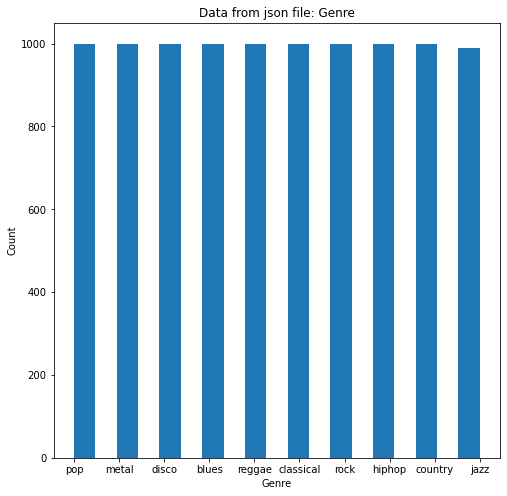

In [9]:
plot_histogram(df.genre, 19, 'Data from json file: Genre', 'Genre', 'Count', 10, GENRE_CATEGORIES)

As we can see from the graph above, our dataset is very balanced. Therefore, we can skip the process of handling imbalanced data.

### Inspecting Genres

We will now look at the visual representation of each genre through a spectrogram which shows how quickly the frequencies themselves are changing over time. The first axis is frequency while the second axis is time.

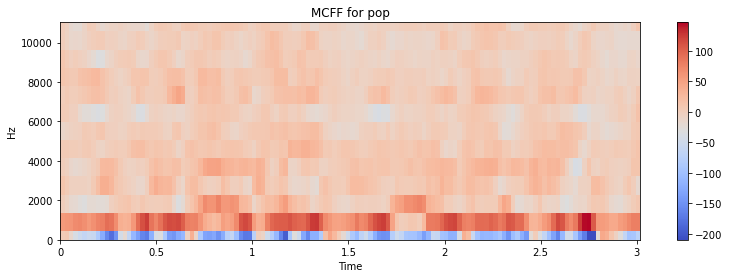

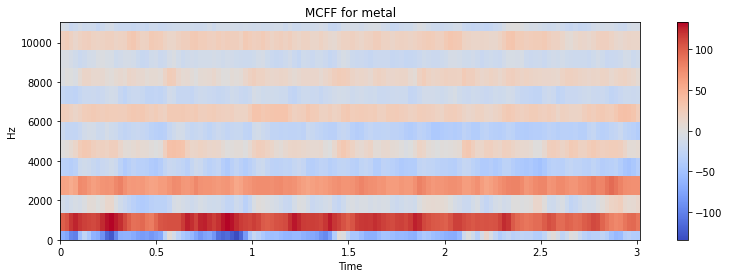

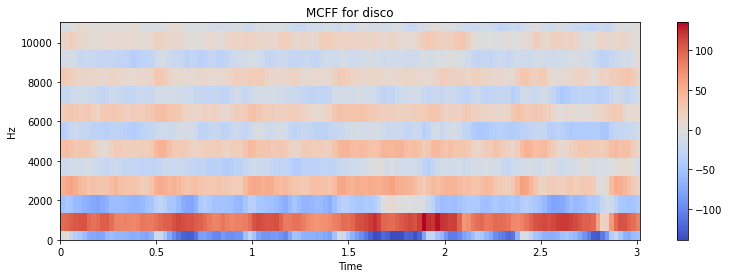

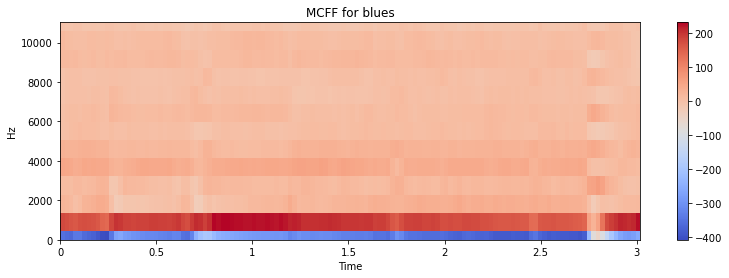

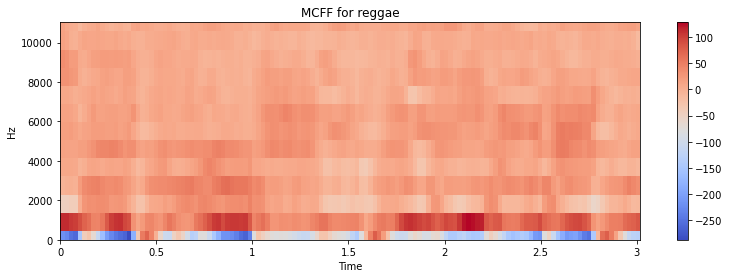

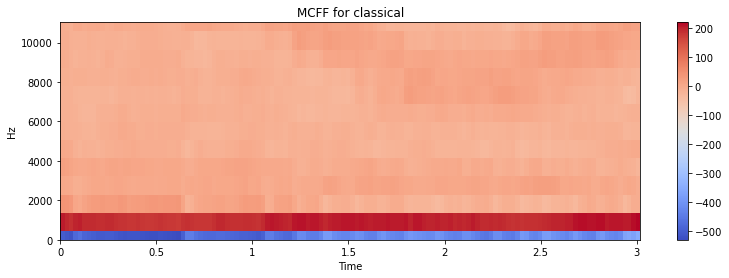

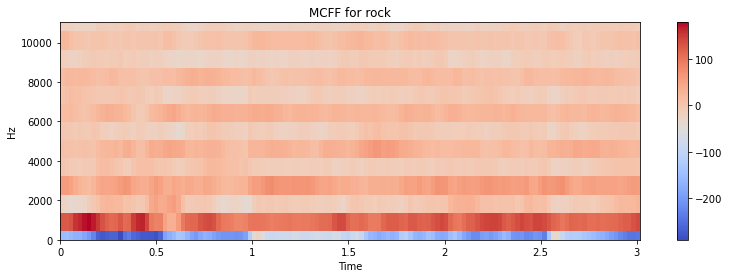

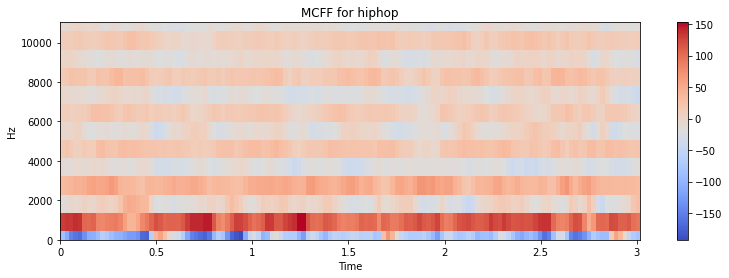

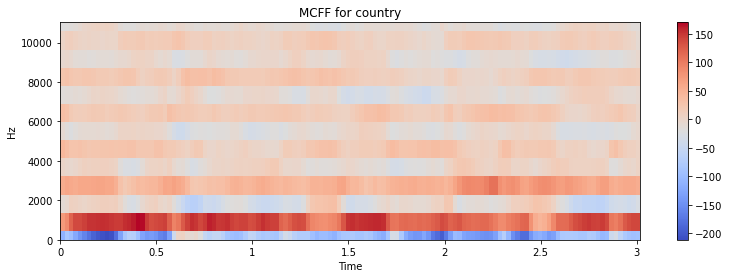

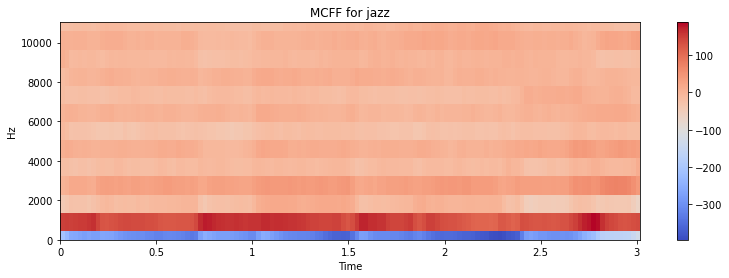

In [10]:
for i, g in enumerate(GENRE_CATEGORIES):
    plt.figure(figsize=(13,4))
    librosa.display.specshow(np.array(np.swapaxes(df[df['genre']==i].mfcc.values[1], 0,1)), x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.title('MCFF for ' + g)

As we can see genres with a low pitch for e.g metal usually has a lower frequency whereas high pitched genres for e.g jazz usually have a higher frequency.

## 4. Split and preprocessing data

First let's create our feature $\boldsymbol{X}$ and target $\boldsymbol{y}$

In [11]:
X = []
with open("data.json", "r") as fp:
    data = json.load(fp)
    for d in data:
        X.append(d['mfcc'])
X = np.array(X, dtype='float32')
X.shape

(9986, 130, 13)

In [189]:
X[0].shape

(130, 13)

In [12]:
y = np.array(df.loc[:,'genre'].values, dtype='int32')
y.shape

(9986,)

To have the data ready for training, we are going to randomly split $(\boldsymbol{X}, \boldsymbol{y})$ into three parts, with no overlap.

Using a 60/20/20 split, we seperate $\boldsymbol{X}$ and $\boldsymbol{y}$ in training, validation and testing.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

# add an axis to input sets
X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]

print(len(X_train))
print(len(X_validation))
print(len(X_test))

5991
1997
1998


## 5. Modelling and Training

In this step, we are going to experiment training with different types of models. 

We now define plot_history which will be used later to plot accuracy/loss for training/validation set as a function of the epochs.

In [14]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy evaluation")
   
    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error evaluation")

    
    fig.tight_layout()

    plt.show()

## Convolutional Neural Networks

We are now going to train the data with a Convolutional Neural Network. We start by defining a general function that will help us create the model.

In [15]:
tf.random.set_seed(0)

def build_model(input_shape):
    """Generates CNN model
    :param input_shape (tuple): Shape of input set
    :return model: CNN model
    """

    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [16]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)
cnn = build_model(input_shape)

2021-12-03 23:25:55.227465: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Here is a summary of the model.

In [17]:
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
cnn.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 11, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 6, 32)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 6, 32)         128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 4, 32)         9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 2, 32)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 2, 32)         128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 1, 32)         4

The following cell will train the cnn model.

In [18]:
history = cnn.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

Epoch 1/30


2021-12-03 23:25:55.315705: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


188/188 [==============================] - 4s 18ms/step - loss: 2.5774 - accuracy: 0.1921 - val_loss: 1.8180 - val_accuracy: 0.3741
Epoch 2/30
188/188 [==============================] - 3s 18ms/step - loss: 1.8987 - accuracy: 0.3410 - val_loss: 1.5455 - val_accuracy: 0.4557
Epoch 3/30
188/188 [==============================] - 3s 16ms/step - loss: 1.6515 - accuracy: 0.4138 - val_loss: 1.4029 - val_accuracy: 0.5033
Epoch 4/30
188/188 [==============================] - 3s 17ms/step - loss: 1.5197 - accuracy: 0.4667 - val_loss: 1.3185 - val_accuracy: 0.5303
Epoch 5/30
188/188 [==============================] - 3s 16ms/step - loss: 1.4208 - accuracy: 0.4968 - val_loss: 1.2413 - val_accuracy: 0.5618
Epoch 6/30
188/188 [==============================] - 3s 16ms/step - loss: 1.3004 - accuracy: 0.5326 - val_loss: 1.2059 - val_accuracy: 0.5663
Epoch 7/30
188/188 [==============================] - 3s 16ms/step - loss: 1.2506 - accuracy: 0.5527 - val_loss: 1.1804 - val_accuracy: 0.5799
Epoch 8/30

Having a look at the testing accuracy. We obtain the following accuracy:

In [19]:
test_loss, test_acc = cnn.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', "{:.2f}%".format(test_acc*100))

63/63 - 0s - loss: 0.8279 - accuracy: 0.7237

Test accuracy: 72.37%


Let's now take a look at the learning curves.

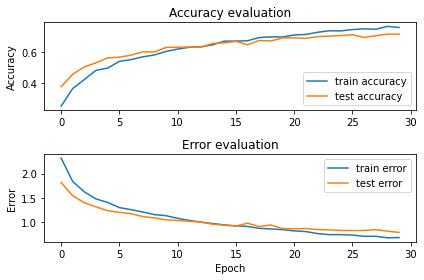

In [20]:
plot_history(history)

From the test error, we can observe we were quite overfitting the model.

## Recurrent neural network 

We are now going to train the data with a Recurrent Neural Network. As usual, we start by defining a general function that will help us create the model.

In [21]:
tf.random.set_seed(0)

def build_model(input_shape):
    """Generates RNN-LSTM model
    :param input_shape (tuple): Shape of input set
    :return model: RNN-LSTM model
    """

    # build network topology
    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(64))

    # dense layer
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [22]:
input_shape = (X_train.shape[1], X_train.shape[2])  # 130, 13
rnn = build_model(input_shape)

NotImplementedError: Cannot convert a symbolic Tensor (lstm/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

Here is a summary of the rnn model.

In [ ]:
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
rnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

rnn.summary()

The following cell will train the rnn model.

In [ ]:
history = rnn.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

Having a look at the testing accuracy. We obtain the following accuracy:

In [ ]:
test_loss, test_acc = rnn.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', "{:.2f}%".format(test_acc))

Let's take a look at the learning curves

In [ ]:
plot_history(history)

## 6. Evaluating Models

In this section, we'll try to draw out conclusions from the models trained and compare their results.

We define a function plot_confusion_matrix to plot tensorflow predictions.

In [23]:
def plot_confusion_matrix(y_true, y_pred, labels):
    '''
    Plot confusion matrix from y_true and y_pred with labels.
    '''
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred)
    disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                                  display_labels=labels)
    disp.plot()
    plt.xticks(rotation='vertical')
    plt.show()

### Comparing best neural network models

In [41]:
y_cnn_pred = np.argmax(cnn.predict(X_test), axis=1)

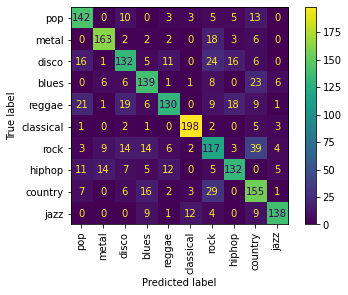

In [25]:
plot_confusion_matrix(y_test, y_cnn_pred, GENRE_CATEGORIES)

In [157]:
print(sklearn.metrics.classification_report(y_test,y_cnn_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74       181
           1       0.84      0.83      0.84       196
           2       0.67      0.63      0.65       211
           3       0.71      0.73      0.72       190
           4       0.77      0.61      0.68       214
           5       0.90      0.93      0.92       212
           6       0.53      0.55      0.54       211
           7       0.75      0.69      0.72       191
           8       0.58      0.71      0.64       219
           9       0.87      0.80      0.83       173

    accuracy                           0.72      1998
   macro avg       0.73      0.73      0.73      1998
weighted avg       0.73      0.72      0.72      1998



As we can see from the confusion matrix above, our cnn model misclassified rock as country the most, while it best prediction is classical music.

## Just for fun 😁

Input music video link from youtube

In [255]:
# https://www.youtube.com/watch?v=1nCqRmx3Dnw
print("Enter youtube video link: ")
link = input()

Enter youtube video link: 
https://www.youtube.com/watch?v=Jb2stN7kH28


In [256]:
video = YouTube(link)
audio = video.streams.filter(only_audio=True, file_extension='mp4').first()
file = audio.download()

# convert mp4 to wav
base, ext = os.path.splitext(file)
wav_file = base + '.wav'
os.rename(file, wav_file)

You chose the following song: 


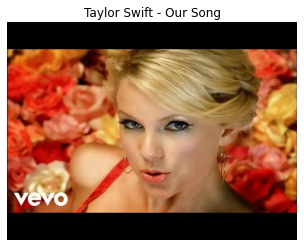

In [257]:
print("You chose the following song: ")
urllib.request.urlretrieve(video.thumbnail_url, 'thumbnail.png')  
img = Image.open("thumbnail.png")
plt.title(video.title)
plt.imshow(img)
plt.axis('off')
ipd.Audio(wav_file) 

The following is our prediction:

In [258]:
dd = []
SAMPLES_PER_TRACK = SAMPLE_RATE * 60
samples_per_segment = int(SAMPLES_PER_TRACK / 20)
num_mfcc_vectors_per_segment = math.ceil(samples_per_segment /512)
signal, sample_rate = librosa.load(wav_file, sr=SAMPLE_RATE)
for d in range(20):

    # calculate start and finish sample for current segment
    start = samples_per_segment * d
    finish = start + samples_per_segment
    print(signal[start:finish].shape)
    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=13, n_fft=2048,
                            hop_length=512)
    mfcc = mfcc.T
    if len(mfcc) == num_mfcc_vectors_per_segment:
        dd.append(mfcc.tolist())
x = np.array(dd)

/opt/miniconda3/envs/mc-ml/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(66150,)
(66150,)
(66150,)
(66150,)
(66150,)
(66150,)
(66150,)
(66150,)
(66150,)
(66150,)
(66150,)
(66150,)
(66150,)
(66150,)
(66150,)
(66150,)
(66150,)
(66150,)
(66150,)
(66150,)


In [260]:
def most_frequent(List):
    return max(set(List), key = List.count)

In [264]:
# x = mfcc
preds = []
for i in range(20):
    x_ = x[i][np.newaxis, ...]
#     print(x_.shape)
    # print(x.shape)(1, 130, 13, 1) (10, 130, 13, 1)
    swapped = np.moveaxis(x_, 0, 2)
    arr4d = np.expand_dims(swapped, 0)
#     print(arr4d.shape)

    prediction = cnn.predict(arr4d)
    # # get index with max value
    predicted_index = np.argmax(prediction, axis=1)
    preds.append(predicted_index[0])
    print(predicted_index)

pred_index = most_frequent(preds)
# print(pred_index)
print(GENRE_CATEGORIES[pred_index])

[4]
[4]
[4]
[4]
[4]
[8]
[4]
[4]
[4]
[4]
[0]
[8]
[8]
[8]
[8]
[8]
[8]
[8]
[8]
[8]
country
